# Описание проекта

Задача для аналитика крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Часть 1. Приоритизация гипотез.

Посмотрим на файл гипотез /datasets/hypothesis.csv

In [2]:
hypo_df = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.set_option('display.max_columns', None)  
pd.options.display.max_colwidth = 150
hypo_df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приоритизируем по разным фреймворкам

### Фреймворк ICE для приоритизации гипотез

Применим фреймворк ICE. Посчитаем показатели и добавим в столбец ice, а затем выведем, отсортировав по убыванию

In [3]:
hypo_df['ICE'] = ((hypo_df['Impact'] * hypo_df['Confidence']) / hypo_df['Efforts']).round(2)
hypo_df[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По методу ICE самые приоритетные гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения (8)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)

### Фреймворк RICE для приоритизации гипотез

Теперь воспользуемая оценкой RICE.

In [4]:
hypo_df['RICE'] = ((hypo_df['Reach'] * hypo_df['Impact'] * hypo_df['Confidence']) / hypo_df['Efforts']).round(2)

hypo_df[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По этой метрике самые приотритетные гипотезы - это 7, 2, 0:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

### Разница приоритизации гипотез при применении RICE вместо ICE.

Приоритизация гипотез при применении RICE и ICE различается. Это связано с тем, что RICE учитывает охват пользователей. Поэтому самая приоритетеная при применении ICE гипотеза: "Запустить акцию, дающую скидку на товар в день рождения" находится только в середине списка при применении RICE. Ведь количество пользователей, у которых день рождения в период проведения акции, ограничено, в то время, как акции с формой подписки и блоками рекомендаций на сайте охватывают всех пользователей.

## Часть 2. Анализ A/B-теста

### Подготовка данных

Результаты A/B-теста описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Для начала взглянем на данные и сохраним их в переменных orders и visitors. Посмотрим информацию о них

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
display(orders)
display(visitors)
orders.info()
visitors.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Приведем информацию о времени к формату date

In [6]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [7]:
#проверим
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Пропусков (явных) в данных нет. Проверим на дубликаты

In [8]:
print(visitors.duplicated().sum())
orders.duplicated().sum()

0


0

Явных дубликатов нет. Теперь посмотрим, есть ли пользователи, которые оказались сразу в обеих группах. Для этого надо cоздать переменную, где сгруппировать заказы по 'visitorId', и посчитать количество уникальных значений в столбце 'group'.

In [9]:
users_duplicated = orders.groupby('visitorId').agg({'group': 'nunique'})
#оставим только тех пользователей, у которых две группы
users_duplicated = users_duplicated.query('group > 1')
#посчитаем сколько процентов от общего числа пользователей оказалось в двух группах
double_percent = ((len(users_duplicated)/orders['visitorId'].value_counts().sum())*100).round(2)
#посмотрим сколько пользователей оказалось сразу в двух группах
print(f'Всего в данных {len(users_duplicated)} двойных пользователей или {double_percent}% от общего числа сделавших заказы')

Всего в данных 58 двойных пользователей или 4.85% от общего числа сделавших заказы


Таким образом в данных о покупках есть пользователи, которые попали и в ту и в другую группу. Их меньше 5% от общего числа сделавших заказы, и, соответственно, совсем мало от общего числа посетителей. Можно пренебречь этими "помехами". Кроме того, мы не знаем только Id людей, сделавших заказы, а сколько "двойных" посетителей в visitors - нет. Поэтому лучше оставить данные как есть и не удалять "двойных" пользователей.

### График кумулятивной выручки по группам

Проанализируем кумулятивную выручку по группам. Для этого сначала надо найти ежедневную выручку по группам, а уже потом - кумулятивную

In [10]:
#находим ежедневную выручку и количество заказов (пригодится при анализе среднего чека) в группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#находим кумулятивную выручку и количество заказов в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#находим ежедневную выручку и количество заказов в группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#находим кумулятивную выручку и количество заказов в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

Построим график

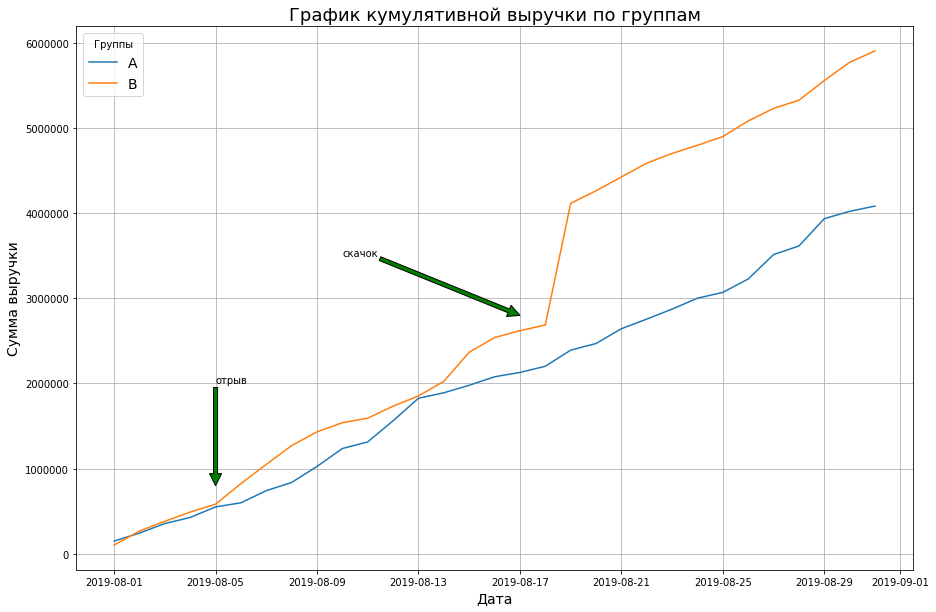

In [41]:
plt.figure(figsize=(15, 10))
plt.title('График кумулятивной выручки по группам', fontsize=18)
# Строим график выручки группы А
plt.plot(ordersACummulative['date'], ordersACummulative['revenueCummulativeA'], label='A')
# Строим график выручки группы Ba
plt.plot(ordersBCummulative['date'], ordersBCummulative['revenueCummulativeB'], label='B')
plt.legend(('A', 'B'),title = 'Группы', fontsize=14)
plt.ylabel('Cумма выручки', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g'))
plt.grid()
plt.show()

На графике видно, что кумулятивная выручка в группе B поначалу лучше незначительно, графики идут практически параллельно, хотя В начинает понемногу отрываться, но 18 августа происходит значительный скачок выручки  - это может быть следствием либо резкого роста числа заказов, либо появления каких-то очень дорогих заказов в эти дни. Дальше графики идут практически параллельно, и, поскольку речь идет о кумулятивной метрике, можно констатировать, что изменение 18 августа - единственно настолько сильно выбивающееся из общей картины. Посмотрим на кумулятивный средний чек.

### График кумулятивного среднего чека по группам.

Постороим график кумулятивного среднего чека

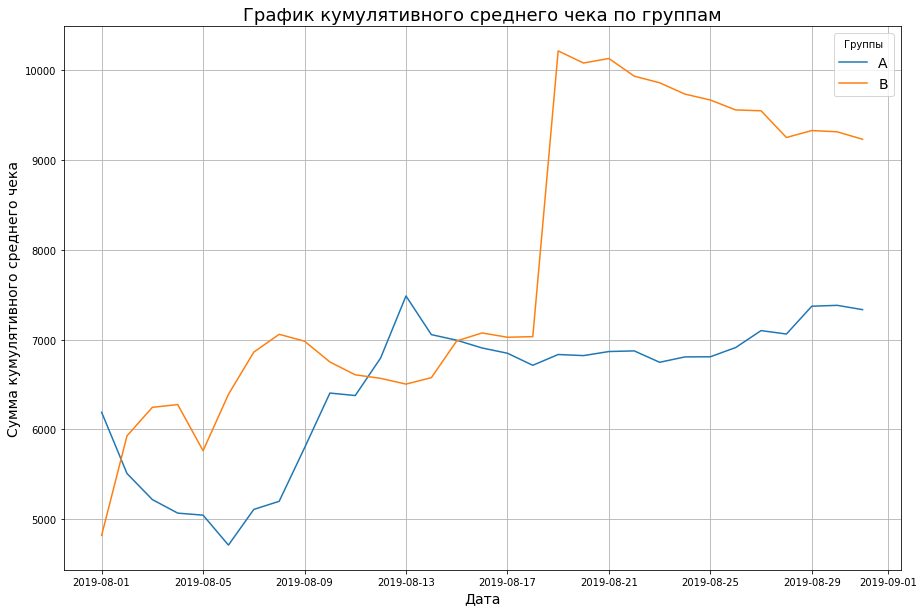

In [12]:
plt.figure(figsize=(15, 10))
plt.title('График кумулятивного среднего чека по группам', fontsize=18)
plt.plot(ordersACummulative['date'], ordersACummulative['revenueCummulativeA']/ordersACummulative['ordersCummulativeA'], label='A')
plt.plot(ordersBCummulative['date'], ordersBCummulative['revenueCummulativeB']/ordersBCummulative['ordersCummulativeB'], label='A')
plt.legend(('A', 'B'),title = 'Группы', fontsize=14)
plt.ylabel('Cумма кумулятивного среднего чека', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.grid()
plt.show()

График кумулятивного среднего чека показывает, что:
 - дублируется резкий скачок в группе В 18 августа, т.е. размер среднего чека для группы B в этот день резко вырос - очевидно, присутствуют какие-то выбивающиеся значения в данных. При этом дальше средний чек в группе относительно стабилен и начинает немного снижаться, что говорит об отсутствии других подобных аномальных скачков.
 - средний чек в группе A после двух недель наблюдений фиксируется вокруг 7000.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

Теперь построим график относительно изменения кумулятивного среднего чека

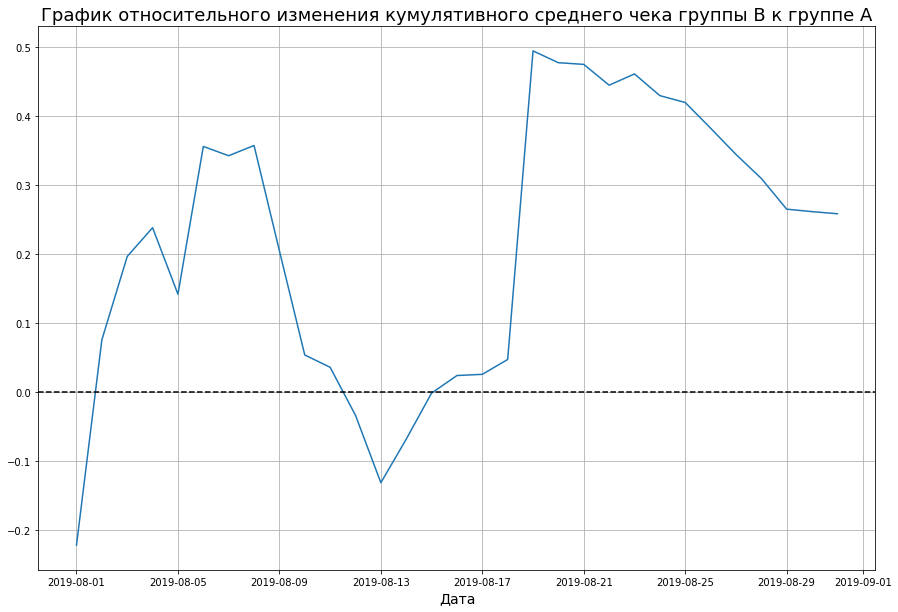

In [13]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = ordersACummulative.merge(ordersBCummulative, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 10))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=18)
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], ((ordersBCummulative['revenueCummulativeB']/ordersBCummulative['ordersCummulativeB'])/(ordersACummulative['revenueCummulativeA']/ordersACummulative['ordersCummulativeA'])-1))
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата', fontsize=14)
plt.grid()
plt.show()

График довольно сильно скачет в обе стороны и только после 18 августа видна какая-то тенденция к стабилизации, но уверенно говорить, что график стабилизировался - нельзя.

### График кумулятивной конверсии по группам

Чтобы построить график кумулятивной конверсии, нужно сначала вычислить данные по пользователям

In [14]:
#количество пользователей на дату в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#количество пользователей до выбранной даты включительно в группе В
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#количество пользователей на дату в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#количество пользователей до выбранной даты включительно в группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Объединим все данные (по пользователям и заказам) в одном датасете.

In [15]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
#проверим
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


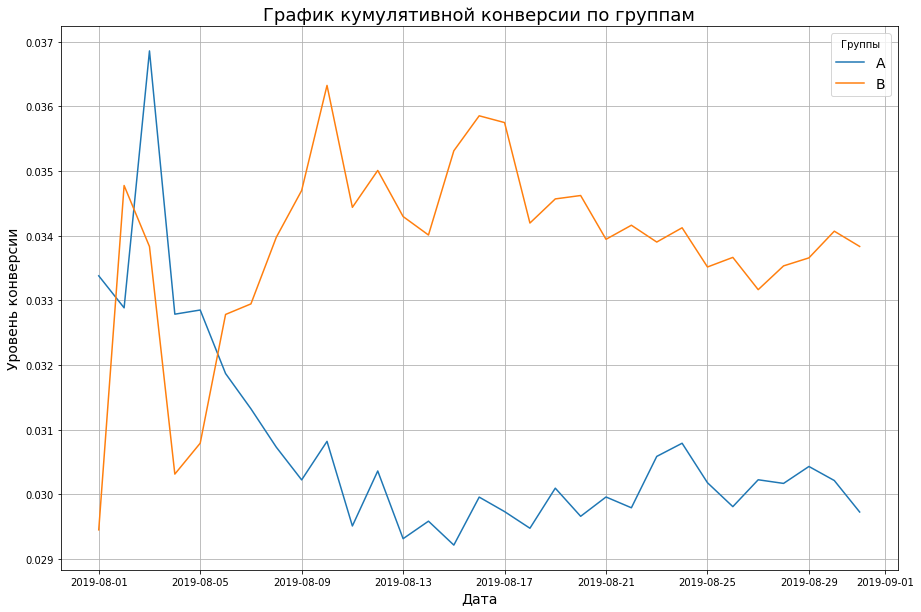

In [16]:
# считаем кумулятивную конверсию по группам
data['conversionCummulativeA'] = data['ordersCummulativeA']/data['visitorsCummulativeA']
data['conversionCummulativeB'] = data['ordersCummulativeB']/data['visitorsCummulativeB']
#строим график
plt.figure(figsize=(15, 10))
plt.title('График кумулятивной конверсии по группам', fontsize=18)
# Строим график выручки группы А
plt.plot(data['date'], data['conversionCummulativeA'], label='A')
# Строим график выручки группы B
plt.plot(data['date'], data['conversionCummulativeB'], label='B')
plt.legend(('A', 'B'),title = 'Группы', fontsize=14)
plt.ylabel('Уровень конверсии', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.grid()
plt.show()

Как видно из графика, кумулятивная конверсия в группе В после скачков вначале и стабилизации показателей выше, чем в A, разница составляет в районе 0,3 - 0,4 %. Еще лучше это должно быть видно на графике относительного изменения кумулятивной конверсии. 

### График относительного изменения кумулятивной конверсии группы B к группе A

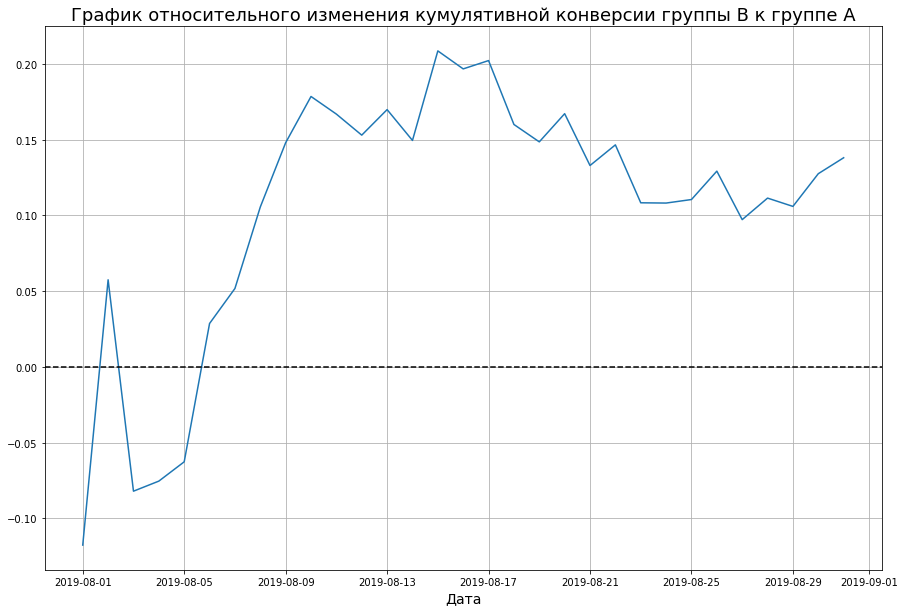

In [17]:
plt.figure(figsize=(15, 10))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', fontsize=18)
plt.plot(data['date'], 
         data['conversionCummulativeB']/data['conversionCummulativeA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата', fontsize=14)
plt.grid()
plt.show()

На этом графике также видно, что, поскольку он больше 0, конверсия группы В в целом больше, чем у А. Вопрос в том, является ли такое различие статистически значимым. Чтобы это понять, нужно изучит заказы и аномальные показатели в них 

### Точечный график количества заказов по пользователям.

Построим точечный график количества заказов на пользователя. Для этого создадим фрейм ordersByUsers, где подсичтаем количество заказов для каждого пользователя.

In [18]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']
#выведем 10 наибольших по количеству заказов пользователей
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Теперь построим точечную диаграмму

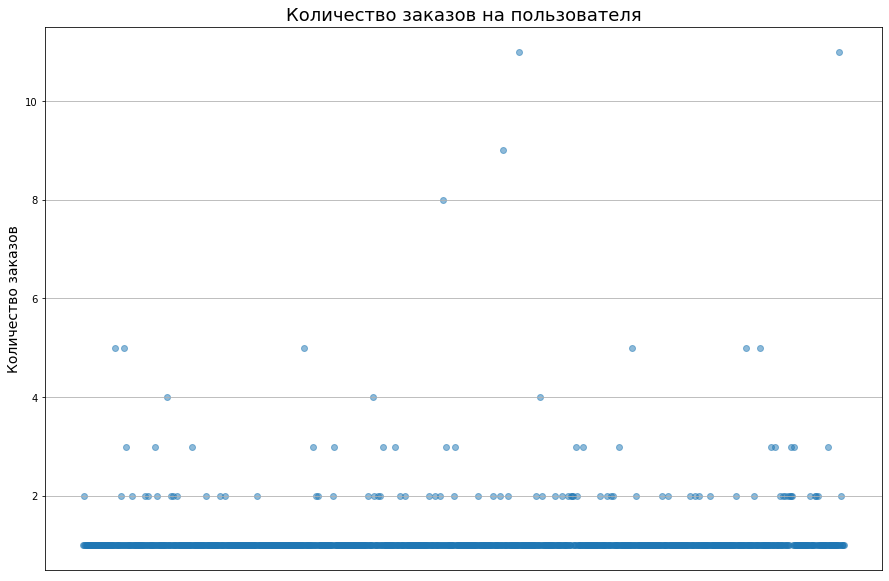

In [29]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15, 10))
plt.title('Количество заказов на пользователя', fontsize=18)
plt.scatter(x_values, ordersByUsers['orders'], alpha = 0.5)
plt.ylabel('Количество заказов', fontsize=14)
plt.xticks([])
plt.grid()
plt.show()

Как видно, наиболее типичной является ситуация, когда 1 пользователь делает 1 заказ, реже - 2 или 3, для 4 и более заказов точек совсем мало. Однако, чтобы понять, какие значения являются аномальными, необходимо определить 95 и 99 перцентили. 

### 95-й и 99-й перцентили количества заказов на пользователя. Граница аномальных значений

Определим 95 и 99 перцентили

In [30]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Эти цифры означачют, что только 5% пользователей делают больше 2 заказов и только 1% - больше 4. Примем за аномальные значения все, где заказов больше 2х.

### Точечный график стоимостей заказов

Теперь посмотрим на аномальные показатели стоимости заказов. для этого построим точечный график стоимости заказов

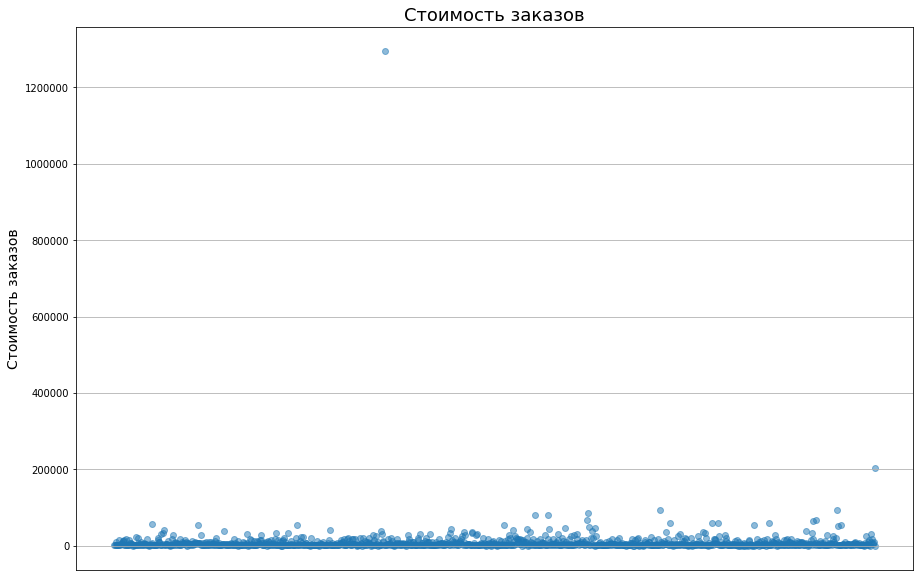

In [33]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15, 10))
plt.title('Стоимость заказов', fontsize=18)
plt.scatter(x_values, orders['revenue'], alpha = 0.5)
plt.ylabel('Стоимость заказов', fontsize=14)
plt.xticks([])
plt.grid()
plt.show()

Подавляющее масса заказов по стоимости лежит в одной плоскости, но есть несколько значений, которые очень сильно выбиваются. Это точно выбросы, скорее всего - ошибки в данных. Взглянем ближе на ту же диаграмму, в пределах до 100000.

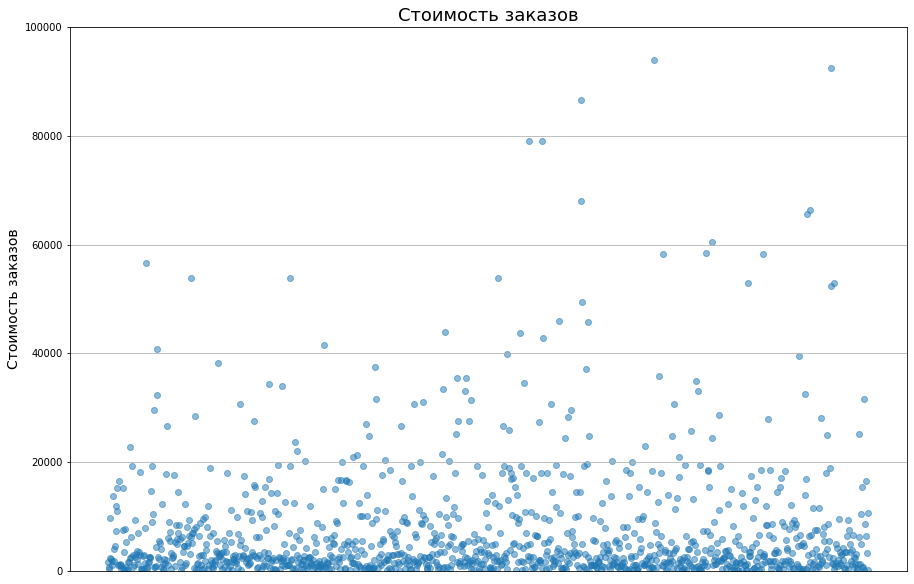

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15, 10))
plt.title('Стоимость заказов', fontsize=18)
plt.scatter(x_values, orders['revenue'], alpha = 0.5)
plt.ylabel('Стоимость заказов', fontsize=14)
plt.xticks([])
plt.grid()
plt.ylim(0, 100000)
plt.show()

Большинство значений не доходят и до 20000. Чтобы точно оценить и отсеять аномальные показатели, посчитаем 95 и 99 перцентили

### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [35]:
np.percentile(orders['revenue'], [95, 99]) 

array([28000. , 58233.2])

Итак, несмотря на то, что в данных есть значение стоимости больше 1 млн., только 1% стоимости заказов превышается отметку в 58233.2, и только 5% больше 28 тыс. Возьмем этот показатель за границу нормальных значений

### Cтатистическая значимость различий в конверсии между группами по «сырым» данным.

Оценим статистическую значимость различий в конверсии по "сырым" данным, применив тест Манна-Уитни. Нулева гипотеза заключается в том, что статистически значимых различий в конверсии между группами А и В нет, альтернативная - что есть.

In [37]:
#создадим переменные с количеством заказов для пользователей групп A и B
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

#cоздадим переменные sampleA и sampleB для теста Манна-Уитни. 
#В них буду те пользователи, которые сделали заказ из переменных ordersByUsers, a также те, кто ничего не заказывал
#Их количество равно разнице между суммой посетителей и количеством записей о заказах: 
#data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

#применим тест, выведем полученное p-value и относительное различие конверсии между группами, прирост конверсии группы В по отношению к А
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.00840
0.138


В результате получилось, что p-value довольно значительно меньше 5%, поэтому можно отврергнуть первоначальную гипотезу о том, что конверсия групп A и B равны и принять, что они не равны. Относительный прирост конверсии группы В к конверсии группы A составляет 13.8%. Однако это подсчеты по "сырым" данным - надо будет взглянуть на очищенные. Но сначала посмотрим на значимость различий в среднем чеке.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Оценим статистическую значимость различий в среднем чеке заказа между группами: применим тест Манна-Уитни, а ткаже посчитаем относительную разницу между средним чеком групп A и B.  

In [38]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value очень большое, намного выше чем статистическая значимость в 5%. Поэтому отвергнуть гипотезу о равенстве среднего чека по "сырым" данным нельзя, даже несмотря на то, что, прирост среднего чека группы B к группе A составляет очень большие 25.9%. Дело здесь, вероятно, в выбросах и аномально больших значениях в группе B. Нужно будет смотреть очищенные данные

### Статистическая значимость различий в конверсии между группами по «очищенным» данным.

Теперь проанализируем очищенные данные, т.е. те, где количество заказов не больше 2х и стоимость заказа не больше 28 тыс.

In [39]:
#выделим пользователей с количеством заказов больше 2
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

#выделим пользователей со стоимостью заказов больше 28 тыс.
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
usersWithExpensiveOrders.columns = ['userId']

#объединим аномальных пользователей в один список
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

#cоздадим sampleAfiltered и sampleBfiltered по аналогии с sampleA и sampleB, но не включая аномальных пользователей
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

#применим тест Манна-Уитни, выведем полученное p-value и относительное различие конверсии между группами
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.00652
0.173


P-value значительно меньше порога в 5%, что позволяет отвергнуть гипотезу о равенстве конверсий A и B. Относительный прирост конверсии группы В к конверсии группы A составляет по очищенным данным еще больше, чем по "сырым" - 17.3%. Конверсия в группе В действительно лучше. 

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [40]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue']
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738
-0.020


P-value осталось практически таким же, как и в сырых данных, намного выше чем статистическая значимость в 5%. Поэтому отвергнуть гипотезу о равенстве среднего чека в двух группах нельзя. Как и предпологалось, очень большая относительная разница среднего чека в группе B по отношению к А после очистки данных исчезла: в очищенных данных наблюдается даже падение среднего чека группы B к группе A, но незначительное - в 2%.

### Решение по результатам теста.

Итак, по итогам анализа результатов теста можно констатировать, что:
- существует статистически значимое различие между группами А и В как по "сырым" данным, так и по очищенным.
- статистически значимых различий в размере среднего чека не обнаружено ни в "сырых" данных, ни после фильтрации.
- график кумулятивной конверсии показывает, что конверсия группы B и прирост конверсии группы В по отношению к А что по "сырым", что по очищенным данным показывают, что конверсия группы В выше.

На основании этих выводов можно признать тест успешным и остановить его, зафиксировав победу группы В.

## Вывод

### Приоритизация гипотез

В результате исследования были приоритизированы 9 гипотез по методам ICE и RICE. 
- Запустить акцию, дающую скидку на товар в день рождения (8)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)

По методу RICE самые приотритетные гипотезы - это 7, 2, 0:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Разница обусловлена тем, что в случае RICE учитывается охват пользователей: гипотезы о форме подписки и блоках рассылки охватывают всех. Нужно отметить, что в топе по обоим методам есть гипотеза о новых каналах привлечения трафика - на 2 и 3 месте соответственно.

### Результаты A/B теста

Данные по результатам проведения теста не содержат пропусков или дубликатов, однако, по какой то причине есть пользователи, сделавшие заказ, которые попали в обе группы. Тем не менее, таких пользователей немного и этим можно пренебречь.

В данных есть аномальные значения количества и стоимости заказов, нормальными (95% значений) можно считать не более 2х заказов на пользователя и стоимость заказа не более 28 тыс.

По итогам анализа результатов теста можно констатировать, что:
- существует статистически значимое различие между группами А и В как по "сырым" данным, так и по очищенным.
- статистически значимых различий в размере среднего чека не обнаружено ни в "сырых" данных, ни после фильтрации.
- график кумулятивной конверсии показывает, что конверсия группы B и прирост конверсии группы В по отношению к А, что по "сырым", что по очищенным данным для группы В выше.

На основании этих выводов можно признать тест успешным и остановить его, зафиксировав победу группы В, конверсия в ней выше, хотя разницы в размере среднего чека не зафиксировано.